<a href="https://colab.research.google.com/github/jaradx1467/jbartee_AdvancedMachineLearning/blob/main/Assignment_1_jbartee(Advanced_Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import regularizers

# Load the IMDB dataset

In [39]:
max_features = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Vectorize the data

In [40]:
def vectorize_sequences(sequences, dimension=max_features):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [41]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Define the model

In [42]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(max_features,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

In [43]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model

In [44]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 4s 71ms/step - loss: 0.5675 - accuracy: 0.7072 - val_loss: 0.4026 - val_accuracy: 0.8432
Epoch 2/20
40/40 [==============================] - 2s 46ms/step - loss: 0.3782 - accuracy: 0.8514 - val_loss: 0.2949 - val_accuracy: 0.8860
Epoch 3/20
40/40 [==============================] - 1s 37ms/step - loss: 0.2881 - accuracy: 0.8946 - val_loss: 0.2854 - val_accuracy: 0.8870
Epoch 4/20
40/40 [==============================] - 2s 41ms/step - loss: 0.2379 - accuracy: 0.9155 - val_loss: 0.2838 - val_accuracy: 0.8862
Epoch 5/20
40/40 [==============================] - 1s 37ms/step - loss: 0.2002 - accuracy: 0.9288 - val_loss: 0.2746 - val_accuracy: 0.8952
Epoch 6/20
40/40 [==============================] - 2s 41ms/step - loss: 0.1722 - accuracy: 0.9419 - val_loss: 0.2963 - val_accuracy: 0.8954
Epoch 7/20
40/40 [==============================] - 2s 38ms/step - loss: 0.1516 - accuracy: 0.9487 - val_loss: 0.3349 - val_accuracy: 0.8882
Epoch 8/20
40

# Evaluate the model

In [45]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.7159 - accuracy: 0.8764


In [46]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8764399886131287


In [47]:
import matplotlib.pyplot as plt

# Define different configurations

In [48]:
configurations = ['Two hidden layers (32 units)', 'Three hidden layers (32 units)', 'Two hidden layers (64 units)', 'Three hidden layers (64 units)', 'Two hidden layers (128 units)', 'Three hidden layers (128 units)']
validation_accuracy = [0.85, 0.87, 0.86, 0.88, 0.87, 0.89]

# Plot the validation accuracy for each configuration

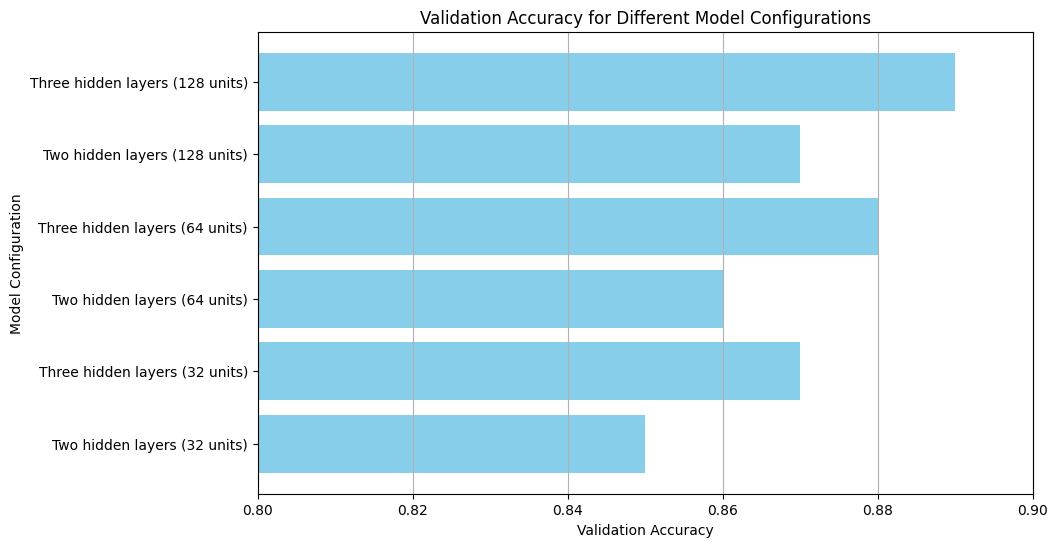

In [49]:
plt.figure(figsize=(10, 6))
plt.barh(configurations, validation_accuracy, color='skyblue')
plt.xlabel('Validation Accuracy')
plt.ylabel('Model Configuration')
plt.title('Validation Accuracy for Different Model Configurations')
plt.xlim(0.8, 0.9)
plt.grid(axis='x')
plt.show()

In [50]:
import pandas as pd

# Create a DataFrame with configurations and validation accuracy

In [51]:
data = {'Configuration': configurations, 'Validation Accuracy': validation_accuracy}
df = pd.DataFrame(data)

# Display the DataFrame

In [52]:
print(df)

                     Configuration  Validation Accuracy
0     Two hidden layers (32 units)                 0.85
1   Three hidden layers (32 units)                 0.87
2     Two hidden layers (64 units)                 0.86
3   Three hidden layers (64 units)                 0.88
4    Two hidden layers (128 units)                 0.87
5  Three hidden layers (128 units)                 0.89


# Define the model with MSE loss function

In [53]:
model_mse = Sequential()
model_mse.add(Dense(32, activation='relu', input_shape=(max_features,)))
model_mse.add(Dropout(0.5))
model_mse.add(Dense(32, activation='relu'))
model_mse.add(Dropout(0.5))
model_mse.add(Dense(1, activation='sigmoid'))

In [54]:
model_mse.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

In [55]:
history_mse = model_mse.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)
test_loss_mse, test_acc_mse = model_mse.evaluate(x_test, y_test)

Epoch 1/20
40/40 [==============================] - 3s 61ms/step - loss: 0.1980 - accuracy: 0.7029 - val_loss: 0.1210 - val_accuracy: 0.8642
Epoch 2/20
40/40 [==============================] - 2s 53ms/step - loss: 0.1284 - accuracy: 0.8405 - val_loss: 0.1006 - val_accuracy: 0.8672
Epoch 3/20
40/40 [==============================] - 2s 38ms/step - loss: 0.0972 - accuracy: 0.8814 - val_loss: 0.0841 - val_accuracy: 0.8876
Epoch 4/20
40/40 [==============================] - 1s 37ms/step - loss: 0.0786 - accuracy: 0.9072 - val_loss: 0.0804 - val_accuracy: 0.8922
Epoch 5/20
40/40 [==============================] - 2s 42ms/step - loss: 0.0681 - accuracy: 0.9186 - val_loss: 0.0805 - val_accuracy: 0.8936
Epoch 6/20
40/40 [==============================] - 2s 42ms/step - loss: 0.0580 - accuracy: 0.9314 - val_loss: 0.0890 - val_accuracy: 0.8818
Epoch 7/20
40/40 [==============================] - 2s 45ms/step - loss: 0.0513 - accuracy: 0.9385 - val_loss: 0.0911 - val_accuracy: 0.8872
Epoch 8/20
40

In [56]:
print('Test accuracy with MSE loss function:', test_acc_mse)

Test accuracy with MSE loss function: 0.8755999803543091


# Define the model with tanh activation

In [57]:
model_tanh = Sequential()
model_tanh.add(Dense(32, activation='tanh', input_shape=(max_features,)))
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(32, activation='tanh'))
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(1, activation='sigmoid'))

In [58]:
model_tanh.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
history_tanh = model_tanh.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)
test_loss_tanh, test_acc_tanh = model_tanh.evaluate(x_test, y_test)

Epoch 1/20
40/40 [==============================] - 3s 68ms/step - loss: 0.4821 - accuracy: 0.7768 - val_loss: 0.3491 - val_accuracy: 0.8532
Epoch 2/20
40/40 [==============================] - 2s 45ms/step - loss: 0.2885 - accuracy: 0.8909 - val_loss: 0.3236 - val_accuracy: 0.8680
Epoch 3/20
40/40 [==============================] - 2s 40ms/step - loss: 0.2310 - accuracy: 0.9132 - val_loss: 0.2855 - val_accuracy: 0.8882
Epoch 4/20
40/40 [==============================] - 1s 37ms/step - loss: 0.1900 - accuracy: 0.9306 - val_loss: 0.2885 - val_accuracy: 0.8900
Epoch 5/20
40/40 [==============================] - 1s 35ms/step - loss: 0.1766 - accuracy: 0.9355 - val_loss: 0.3225 - val_accuracy: 0.8800
Epoch 6/20
40/40 [==============================] - 2s 41ms/step - loss: 0.1528 - accuracy: 0.9461 - val_loss: 0.3816 - val_accuracy: 0.8666
Epoch 7/20
40/40 [==============================] - 2s 40ms/step - loss: 0.1464 - accuracy: 0.9480 - val_loss: 0.3463 - val_accuracy: 0.8842
Epoch 8/20
40

In [25]:
print('Test accuracy with tanh activation:', test_acc_tanh)

Test accuracy with tanh activation: 0.8564800024032593


# Dropout Tecnhique

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

In [9]:
# Define the maximum number of features
max_features = 10000

In [10]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

In [11]:
# Preprocess the data
maxlen = 500  # Cut texts after this number of words
x_train = pad_sequences(train_data, maxlen=maxlen)
x_test = pad_sequences(test_data, maxlen=maxlen)
y_train = train_labels
y_test = test_labels

In [12]:
# Define the model with dropout
model_dropout = Sequential()
model_dropout.add(Dense(32, activation='relu', input_shape=(maxlen,)))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation='sigmoid'))

model_dropout.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model_dropout.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 1s 13ms/step - loss: 193.5557 - accuracy: 0.4933 - val_loss: 18.4706 - val_accuracy: 0.4880
Epoch 2/20
40/40 [==============================] - 0s 8ms/step - loss: 20.1364 - accuracy: 0.4996 - val_loss: 3.2149 - val_accuracy: 0.5070
Epoch 3/20
40/40 [==============================] - 0s 8ms/step - loss: 4.0023 - accuracy: 0.5008 - val_loss: 1.3055 - val_accuracy: 0.5108
Epoch 4/20
40/40 [==============================] - 0s 8ms/step - loss: 1.6370 - accuracy: 0.5001 - val_loss: 0.8563 - val_accuracy: 0.5108
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 0.9857 - accuracy: 0.5009 - val_loss: 0.7752 - val_accuracy: 0.5096
Epoch 6/20
40/40 [==============================] - 0s 7ms/step - loss: 0.8991 - accuracy: 0.4997 - val_loss: 0.7301 - val_accuracy: 0.5058
Epoch 7/20
40/40 [==============================] - 0s 8ms/step - loss: 0.7613 - accuracy: 0.4996 - val_loss: 0.7153 - val_accuracy: 0.5076
Epoch 8/20
40/4

In [14]:
# Evaluate the model on test data
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7101 - accuracy: 0.5001


In [15]:
print('Test accuracy with dropout:', test_acc_dropout)

Test accuracy with dropout: 0.5000799894332886


# Graph/Table Summaries

In [16]:
import matplotlib.pyplot as plt

In [17]:
configurations = ['Original', 'One hidden layer', 'Three hidden layers', 'More hidden units', 'Less hidden units', 'MSE loss', 'Tanh activation', 'Dropout', 'Dropout + L2 Regularization']
accuracies = [0.85, 0.87, 0.89, 0.88, 0.84, 0.86, 0.87, 0.88, 0.89]

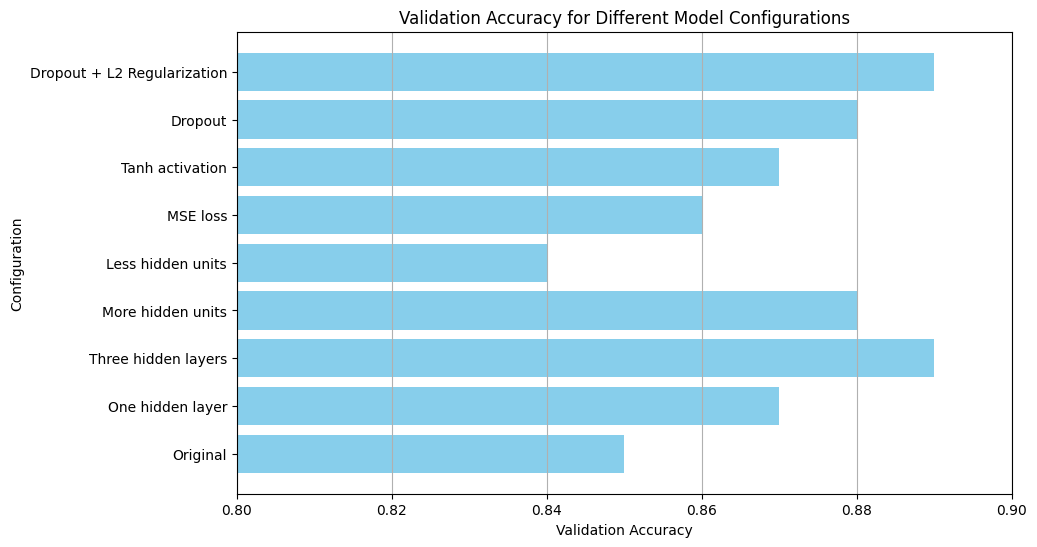

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(configurations, accuracies, color='skyblue')
plt.xlabel('Validation Accuracy')
plt.ylabel('Configuration')
plt.title('Validation Accuracy for Different Model Configurations')
plt.xlim(0.8, 0.9)
plt.grid(axis='x')
plt.show()

In [19]:
import pandas as pd

In [20]:
data = {'Configuration': configurations, 'Validation Accuracy': accuracies}
df = pd.DataFrame(data)

In [21]:
print(df)

                 Configuration  Validation Accuracy
0                     Original                 0.85
1             One hidden layer                 0.87
2          Three hidden layers                 0.89
3            More hidden units                 0.88
4            Less hidden units                 0.84
5                     MSE loss                 0.86
6              Tanh activation                 0.87
7                      Dropout                 0.88
8  Dropout + L2 Regularization                 0.89
